<a href="https://colab.research.google.com/github/Chitra0007/Image-Classification/blob/main/Image_classification_on_MNIST_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt


In [2]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizing pixel values to range [0, 1]

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Define the architecture of the deep learning model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Flatten the 28x28 images into a 1D array
    layers.Dense(128, activation='relu'),     # Fully connected layer with 128 neurons and ReLU activation
    layers.Dropout(0.2),                       # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')     # Output layer with 10 neurons (one for each digit) and softmax activation
])


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2930 - accuracy: 0.9155 - val_loss: 0.1419 - val_accuracy: 0.9576
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1407 - accuracy: 0.9578 - val_loss: 0.0983 - val_accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1041 - accuracy: 0.9685 - val_loss: 0.0862 - val_accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0863 - accuracy: 0.9735 - val_loss: 0.0764 - val_accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0722 - accuracy: 0.9776 - val_loss: 0.0759 - val_accuracy: 0.9764


313/313 [==============================] - 2s 5ms/step - loss: 0.0759 - accuracy: 0.9764
Test accuracy: 0.9764000177383423


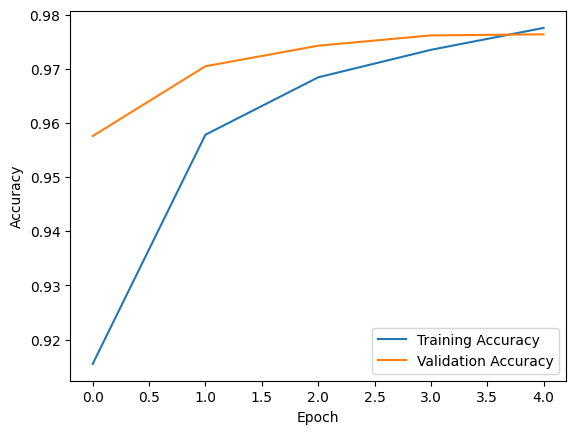

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
